In [35]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

(-50.0, 1050.0, -50.0, 1050.0)

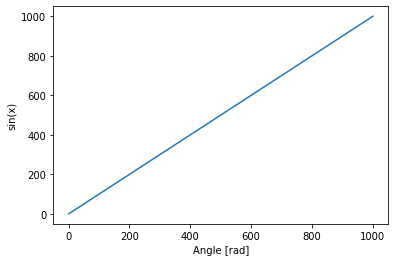

In [13]:
x = np.linspace(0, 1000)
y = np.linspace(0, 1000)
plt.plot(x, y)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')

In [11]:
def format_data(data: np.ndarray):
    return np.unwrap(np.mod(data, 360) - 180, period=360)

def inverse_format_data(data: np.ndarray):
    return np.mod(data + 180, 360)


(-50.0, 1050.0, -17.71428571428571, 371.99999999999994)

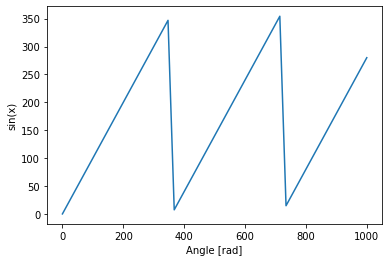

In [14]:
y_prime = inverse_format_data(format_data(y))

plt.plot(x, y_prime)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')

In [21]:
front = np.array([-1, -1, -1, 1])
rear = np.array([1, 1, 1])
front_votes = np.mean(front)
rear_votes = np.mean(rear)
flips = np.where(front_votes < rear_votes, True, False)
print(flips, front_votes, rear_votes)

True -0.5 1.0


In [22]:
dissenting = np.where(front == )

dtype('int32')

In [25]:
expected = np.where(flips, np.array([-1, 1]), np.array([1, -1]))

In [30]:
agree = np.count_nonzero(front + expected[0]) + np.count_nonzero(rear + expected[1])
agree

6

In [32]:
len(front)

4

In [110]:
def compute_score(front, rear, flip):
    expected = np.where(flip[:, None], np.array([-1, 1]), np.array([1, -1]))
    agree = np.count_nonzero(front == expected[:, 0, None], axis=1) + np.count_nonzero(rear == expected[:, 1, None], axis=1)
    total = front.shape[1] + rear.shape[1]
    conf_scores = agree / total
    return conf_scores

def compute_flip(front, rear):
    front_votes = np.mean(front, axis=1)
    rear_votes = np.mean(rear, axis=1)
    flips = np.where(front_votes < rear_votes, True, False)
    return flips

In [108]:
trials = np.array([np.array(t) for t in itertools.product([1, -1], repeat=7)])
flips = compute_flip(trials[:, 0:4], trials[:, 4:])

In [111]:
compute_score(trials[:, 0:4], trials[:, 4:], ~flips)

array([0.42857143, 0.28571429, 0.28571429, 0.14285714, 0.28571429,
       0.14285714, 0.14285714, 0.        , 0.42857143, 0.42857143,
       0.42857143, 0.28571429, 0.42857143, 0.28571429, 0.28571429,
       0.14285714, 0.42857143, 0.42857143, 0.42857143, 0.28571429,
       0.42857143, 0.28571429, 0.28571429, 0.14285714, 0.28571429,
       0.42857143, 0.42857143, 0.42857143, 0.42857143, 0.42857143,
       0.42857143, 0.28571429, 0.42857143, 0.42857143, 0.42857143,
       0.28571429, 0.42857143, 0.28571429, 0.28571429, 0.14285714,
       0.28571429, 0.42857143, 0.42857143, 0.42857143, 0.42857143,
       0.42857143, 0.42857143, 0.28571429, 0.28571429, 0.42857143,
       0.42857143, 0.42857143, 0.42857143, 0.42857143, 0.42857143,
       0.28571429, 0.14285714, 0.28571429, 0.28571429, 0.42857143,
       0.28571429, 0.42857143, 0.42857143, 0.42857143, 0.42857143,
       0.42857143, 0.42857143, 0.28571429, 0.42857143, 0.28571429,
       0.28571429, 0.14285714, 0.28571429, 0.42857143, 0.42857

In [112]:
compute_score(trials[:, 0:4], trials[:, 4:], flips)

array([0.57142857, 0.71428571, 0.71428571, 0.85714286, 0.71428571,
       0.85714286, 0.85714286, 1.        , 0.57142857, 0.57142857,
       0.57142857, 0.71428571, 0.57142857, 0.71428571, 0.71428571,
       0.85714286, 0.57142857, 0.57142857, 0.57142857, 0.71428571,
       0.57142857, 0.71428571, 0.71428571, 0.85714286, 0.71428571,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.71428571, 0.57142857, 0.57142857, 0.57142857,
       0.71428571, 0.57142857, 0.71428571, 0.71428571, 0.85714286,
       0.71428571, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.71428571, 0.71428571, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.71428571, 0.85714286, 0.71428571, 0.71428571, 0.57142857,
       0.71428571, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.71428571, 0.57142857, 0.71428571,
       0.71428571, 0.85714286, 0.71428571, 0.57142857, 0.57142

(array([ 1.,  0., 69.,  0.,  0., 42.,  0., 14.,  0.,  2.]),
 array([0.42857143, 0.48571429, 0.54285714, 0.6       , 0.65714286,
        0.71428571, 0.77142857, 0.82857143, 0.88571429, 0.94285714,
        1.        ]),
 <BarContainer object of 10 artists>)

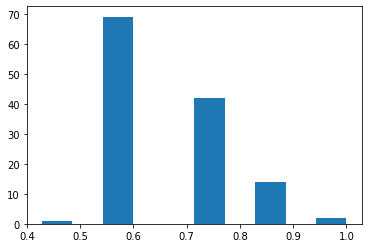

In [113]:
plt.hist(compute_score(trials[:, 0:4], trials[:, 4:], flips))